In [68]:
import pandas as pd
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
import matplotlib.pyplot as plt
import numpy as np


In [69]:
df_per = pd.read_csv('~/Desktop/Performance.csv')
df_per.shape
df_per.head()


,Date,PlayerID,AccelImpulse
0,2017-11-30,2,5.958338
1,2017-11-30,3,5.952386
2,2017-11-30,4,5.921301
3,2017-11-30,6,5.939820
4,2017-11-30,7,5.785719


In [70]:
from datetime import datetime  
from datetime import timedelta

fmt = '%Y-%m-%d'
df_per["train_date"]  = (pd.to_datetime(df_per["Date"], format=fmt) - pd.Timedelta('1 days')).dt.strftime(date_format=fmt)
df_per

,Date,PlayerID,AccelImpulse,train_date
0,2017-11-30,2,5.958338,2017-11-29
1,2017-11-30,3,5.952386,2017-11-29
2,2017-11-30,4,5.921301,2017-11-29
3,2017-11-30,6,5.939820,2017-11-29
4,2017-11-30,7,5.785719,2017-11-29
5,2017-11-30,8,5.948417,2017-11-29
6,2017-11-30,9,5.750005,2017-11-29
7,2017-11-30,10,5.921301,2017-11-29
8,2017-11-30,11,5.888894,2017-11-29
9,2017-11-30,12,5.967597,2017-11-29


In [71]:
df_well = pd.read_csv('~/Desktop/WellnessMeasure.csv')
df_well.shape
#(5011, 7)
df_well.columns

Index(['Date', 'PlayerID', 'Energy', 'Nourishment', 'Discomfort',
       'Determination', 'EWMScore'],
      dtype='object')

In [72]:
df_rpe = pd.read_csv('~/Desktop/RPEdata.csv')
df_rpe.shape
#(7621, 5)
df_rpe

,Date,PlayerID,Training,FactorRatio,FactorRPE
0,2018-07-21,13,Yes,1.500979,1.889948
1,2018-07-21,13,Yes,3.598637,15.843117
2,2018-07-21,13,Yes,3.404329,16.568369
3,2018-07-20,11,Yes,4.362979,17.657537
4,2018-07-20,11,Yes,4.343913,19.094547
5,2018-07-20,11,Yes,2.499585,6.927521
6,2018-07-20,13,Yes,3.264060,14.395289
7,2018-07-20,13,Yes,3.001197,13.327651
8,2018-07-20,13,Yes,1.770216,3.651780
9,2018-07-19,1,Yes,6.446697,24.414287


In [73]:
df_rpe = df_rpe.groupby(["Date","PlayerID"])["FactorRatio","FactorRPE"].mean().reset_index()
df_rpe

,Date,PlayerID,FactorRatio,FactorRPE
0,2017-08-01,1,11.757512,31.683375
1,2017-08-01,3,11.086056,30.092039
2,2017-08-01,5,9.118948,21.005966
3,2017-08-01,8,11.109887,28.295775
4,2017-08-01,9,8.953486,24.193716
5,2017-08-01,10,11.309875,30.622484
6,2017-08-01,11,10.657483,27.594138
7,2017-08-01,12,11.333706,28.826221
8,2017-08-01,13,11.738447,33.120385
9,2017-08-01,15,9.143581,20.648780


In [74]:
df = pd.merge(df_well, df_rpe,  how='left', on=['Date','PlayerID'])

In [75]:
df.dropna()

,Date,PlayerID,Energy,Nourishment,Discomfort,Determination,EWMScore,FactorRatio,FactorRPE
2,2017-08-01,3,12.738413,4.116664,2.645359,10.399158,20.000000,11.086056,30.092039
3,2017-08-01,5,12.186935,3.849988,2.580958,12.575804,23.000000,9.118948,21.005966
4,2017-08-01,13,12.524053,3.412587,2.583743,10.473052,20.000000,11.738447,33.120385
5,2017-08-01,8,18.614064,1.087246,2.825409,15.476140,33.000000,11.109887,28.295775
6,2017-08-01,10,10.961311,3.214301,2.515009,9.804929,18.000000,11.309875,30.622484
7,2017-08-01,12,12.822358,2.503752,2.477125,11.418906,21.000000,11.333706,28.826221
10,2017-08-02,3,12.798434,4.056677,2.586993,10.078656,20.000000,10.263515,24.838341
12,2017-08-02,8,16.295928,1.388407,2.547494,12.941443,29.571429,10.273048,24.119836
13,2017-08-02,11,10.993864,3.374498,2.312023,9.010133,17.000000,7.644417,13.443460
14,2017-08-02,12,12.600066,2.541107,2.436417,10.613006,20.428571,10.273048,24.119836


In [77]:
new_df = pd.merge(df, df_per,  how='left', left_on=['Date','PlayerID'],right_on=["train_date",'PlayerID'])

In [78]:
new_df.dropna()

,Date_x,PlayerID,Energy,Nourishment,Discomfort,Determination,EWMScore,FactorRatio,FactorRPE,Date_y,AccelImpulse,train_date
1798,2017-11-29,6,13.364152,4.177877,2.642958,10.031055,19.939881,6.288163,25.117295,2017-11-30,5.939820,2017-11-29
1800,2017-11-29,9,18.350141,4.279676,3.038468,14.527206,29.036061,4.847197,18.310552,2017-11-30,5.750005,2017-11-29
1801,2017-11-29,3,12.738413,4.116664,2.645359,10.399158,19.188274,6.308831,26.558438,2017-11-30,5.952386,2017-11-29
1804,2017-11-29,7,13.036188,4.131494,2.627095,11.225871,17.939528,7.434012,31.157457,2017-11-30,5.785719,2017-11-29
1805,2017-11-29,12,13.483919,1.826588,2.638780,11.222289,20.527868,6.089095,24.377092,2017-11-30,5.967597,2017-11-29
1806,2017-11-29,10,12.317986,4.074474,1.598794,9.597754,18.744163,6.109362,25.098697,2017-11-30,5.921301,2017-11-29
1807,2017-11-29,11,11.674778,4.218071,2.519142,9.523713,16.635194,6.301381,25.102282,2017-11-30,5.888894,2017-11-29
1808,2017-11-29,13,13.287213,4.174868,2.642742,11.159684,19.829648,7.191891,27.583316,2017-11-30,5.968259,2017-11-29
1811,2017-11-29,8,15.239043,4.067553,2.831256,13.182572,21.785600,6.099429,25.097664,2017-11-30,5.948417,2017-11-29
1813,2017-11-30,2,14.401283,3.863384,2.331754,9.139023,23.022832,3.476300,12.804377,2017-12-01,5.717597,2017-11-30


In [82]:
new_df["logAccel"] = np.log(new_df["AccelImpulse"])
new_df["logRPE"] =np.log(new_df["FactorRPE"])


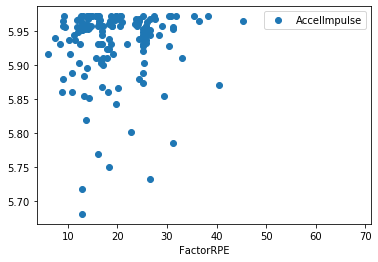

In [83]:
new_df.plot(x='FactorRPE', y='AccelImpulse', style='o')  
#plt.title('MinTemp vs MaxTemp')  
#plt.xlabel('MinTemp')  
#plt.ylabel('MaxTemp')  
plt.show()

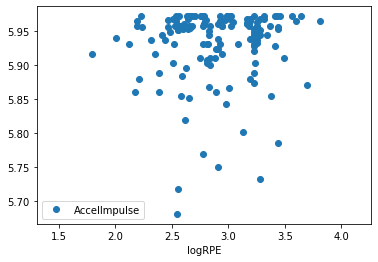

In [84]:
new_df.plot(x='logRPE', y='AccelImpulse', style='o')  
#plt.title('MinTemp vs MaxTemp')  
#plt.xlabel('MinTemp')  
#plt.ylabel('MaxTemp')  
plt.show()

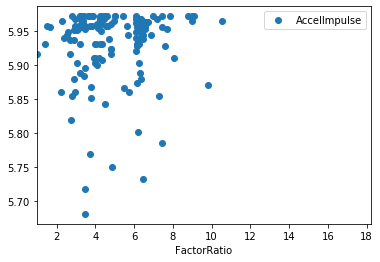

In [85]:
new_df.plot(x='FactorRatio', y='AccelImpulse', style='o')  
#plt.title('MinTemp vs MaxTemp')  
#plt.xlabel('MinTemp')  
#plt.ylabel('MaxTemp')  
plt.show()

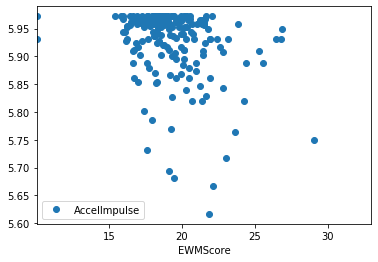

In [86]:
new_df.plot(x='EWMScore', y='AccelImpulse', style='o')  
#plt.title('MinTemp vs MaxTemp')  
#plt.xlabel('MinTemp')  
#plt.ylabel('MaxTemp')  
plt.show()

In [89]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols("logAccel  ~  EWMScore + FactorRatio + FactorRPE", data = new_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               logAccel   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.192
Date:                Tue, 26 Nov 2019   Prob (F-statistic):             0.0915
Time:                        00:18:17   Log-Likelihood:                 488.15
No. Observations:                 148   AIC:                            -968.3
Df Residuals:                     144   BIC:                            -956.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7959      0.007    245.067      